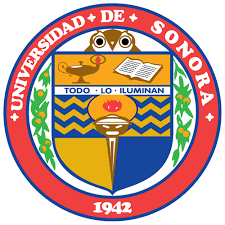



# **Evaluación 3**

*Tercera Evaluación de Física Computacional 1 (2021-1)*

Iveth Rocio Navarro Lopez



---

In [2]:
import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm




---

**Problema 1**

True


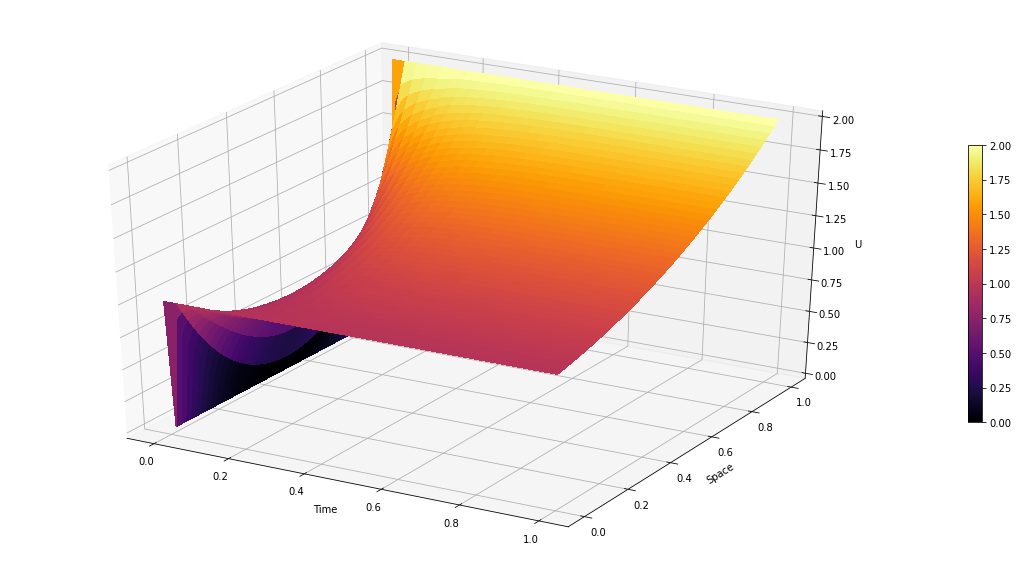

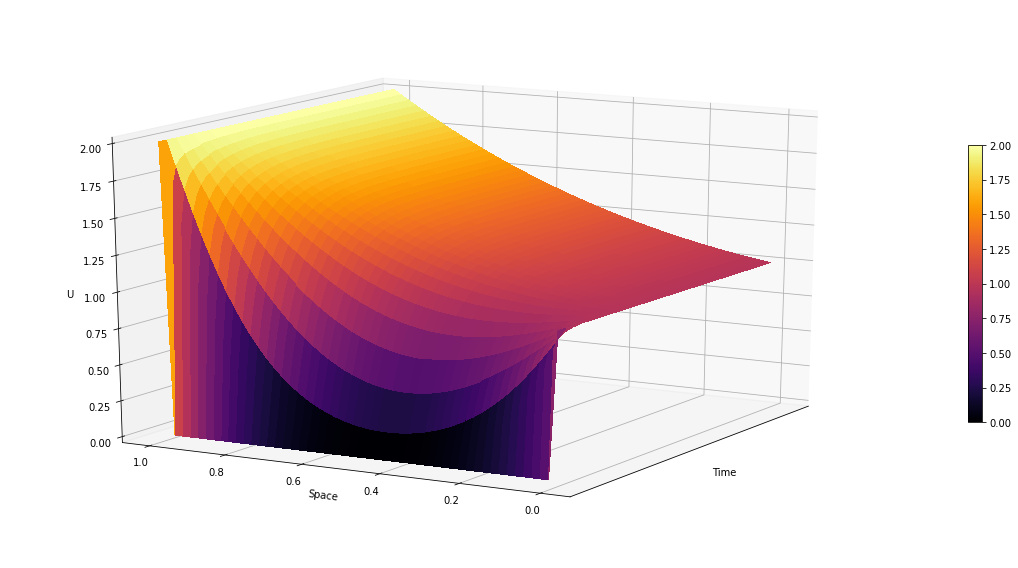

In [24]:
'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
and initial condition u(x,0) = 4*x - 4*x**2
'''

M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

x0 = 0 # Posición inicial 
xL = 1 #Longitud del tubo

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

# Tiempo (inicial y final)
t0 = 0
tF = 1

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0 

#----- Dirichlet boundary conditions -----
U[0,:] = 1.0 #condicion de u(0,t)=1 
U[-1,:] = 2.0 # u(1,t)=2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.inferno, antialiased=False)

#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

m = cm.ScalarMappable(cmap=cm.inferno)
m.set_array(U)
plt.colorbar(m,shrink=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

# Cambiando la perspectiva para la gráfica para fines comparativos:

fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.inferno, antialiased=False)

ax.set_xticks([])

# Tabla de valores 
m = cm.ScalarMappable(cmap=cm.inferno)
m.set_array(U)
plt.colorbar(m,shrink=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
ax.view_init(16, -150)
plt.tight_layout()
plt.show()

***Observaciones***

La gráfica nos muestra que la concentración del compuesto químico *U* comienza en el vacío, pues se encuentra en 0 en el tiempo 0. Luego, podemos observar una molécula en el extremo x=0 y un par al extremo x=1. La concentración claramente se estabiliza a medida que el tiempo transcurre.



---
**Problema 2**


True


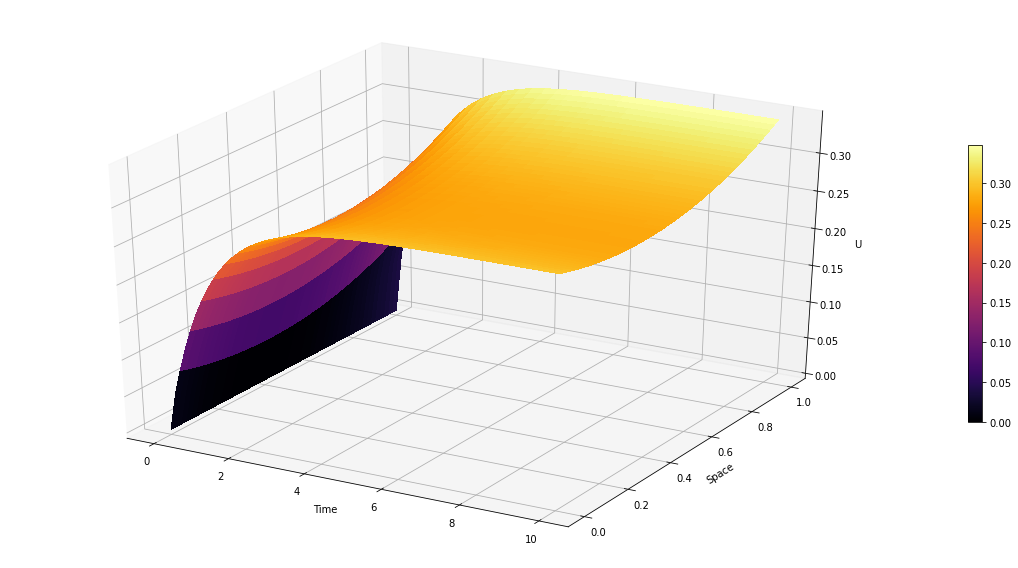

In [23]:
'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Neumann boundary conditions 
at x=0: u_x = sin(pi/2)
at x=L: u_x = sin(3*pi/4) with L=1
and initial condition u(x,0) = 4*x - 4*x**2
'''

M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 10

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha
a = 1 + 2*r - s


xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0 # Observación: Se encuentra inicialmente en el vacío

#----- Neumann boundary conditions -----
tiempo = np.ones([N+1, 1])
f = 0.1*tiempo # Para (0,t)=0.1, es decir,  en x=0 para cualquier t, vale 0.1

g = 0.2*tiempo # Para (1,t)=0.2, es decir, en la frontera derecha es 0.2 en cualquier t


for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  # Right hand side
    U[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.inferno, antialiased=False)

#ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

# Grafica una tabla de valores 
m = cm.ScalarMappable(cmap=cm.inferno)
m.set_array(U)
plt.colorbar(m,shrink=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

***Observaciones***

Podemos comprobar el planteamiento del problema al observar que el tubo inicia vacío. 

Por otra parte, podemos observar que la concentración va incrementando relativamente rápido (no en magnitud) y aparenta estabilizarse en 0.



---
**Problema 3**


True


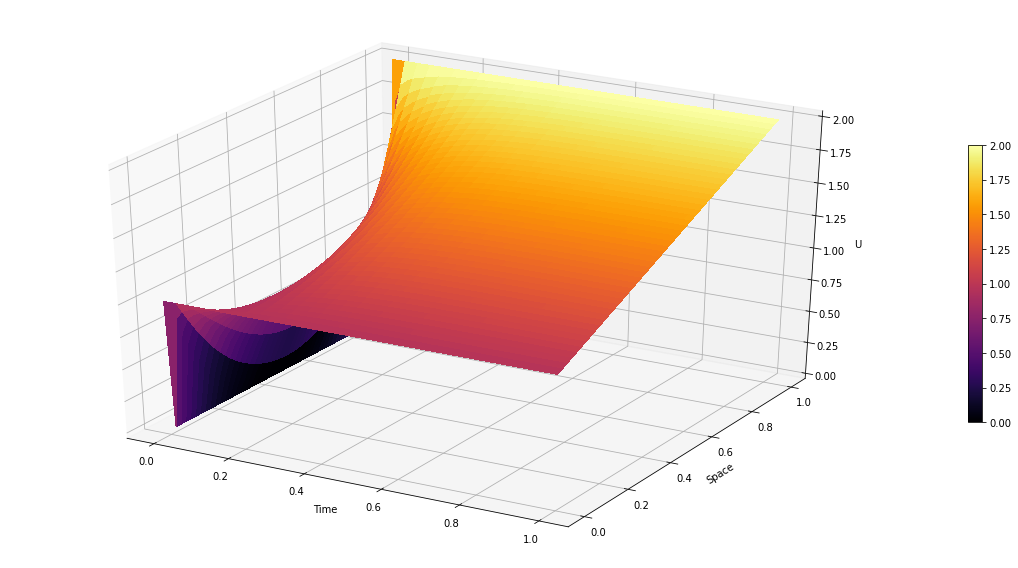

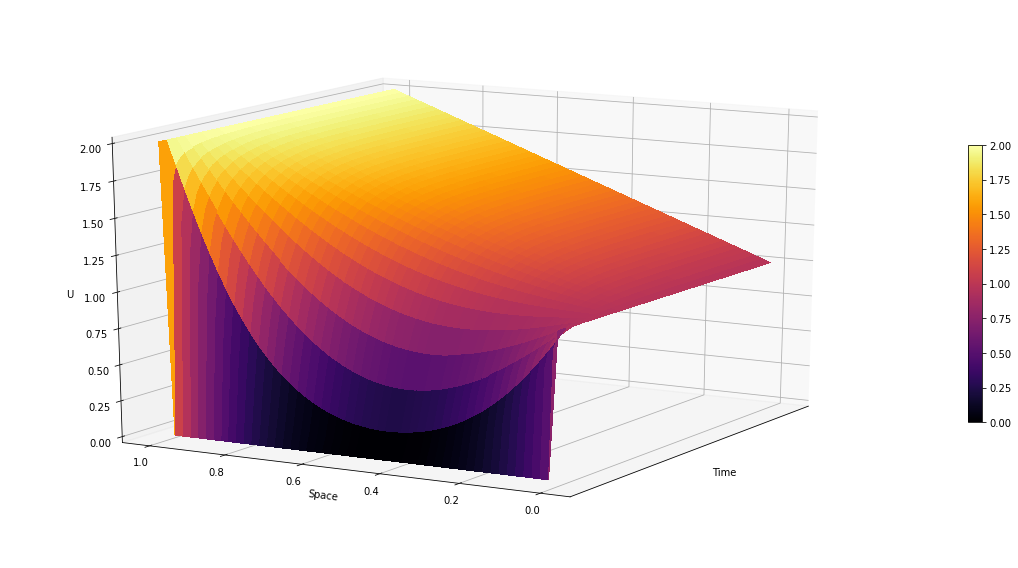

In [26]:

'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
and initial condition u(x,0) = 4*x - 4*x**2
'''

M = 50 # GRID POINTS on space interval
N = 60 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 1

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = 0 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

#Creando la malla
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

#--------------------------------
main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0 # Para u(x,0)=0, es decir, inicia vacío

#----- Dirichlet boundary conditions -----
U[0,:] = 1.0 # u(0,t)=1
U[-1,:] = 2.0 # u(1,t)=2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.inferno, antialiased=False)

#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

# Tabla de valores 
m = cm.ScalarMappable(cmap=cm.inferno)
m.set_array(U)
plt.colorbar(m,shrink=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

# Cambiando de perspectiva la gráfica con fines comparativos

fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.inferno, antialiased=False)

ax.set_xticks([])

#Tabla de valores 
m = cm.ScalarMappable(cmap=cm.inferno)
m.set_array(U)
plt.colorbar(m,shrink=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('U')
ax.view_init(16, -150)
plt.tight_layout()
plt.show()

***Observaciones***

Hay una clara similitud entre los resultados obtenidos en el problema 1 y este. Sin embargo, aunque las condiciones sean similares, debemos tener en cuenta que el coeficiente reacción es mayor, por lo que la concentración del compuesto es ligeramente mayor en este caso y prestando atención a los detalles, al variar el valor de α(α=0), podemos observar un comportamiento más lineal en este caso, pues en el problema 1 se asemejaba más a una parábola. 